## Linear Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error, mean_absolute_error
from statsmodels.stats.stattools import durbin_watson

### Data Exploration

In [3]:
col_names = ["Relative_compactness", "Surface_area", "Wall_area", "Roof_area", "Overall_height", "Orientation", "Glazing_area", "Glazing_dist_area"]

In [4]:
df = pd.read_excel(r"C:\Users\DELL\Desktop\ML\Datasets\energy_efficiency\ENB2012_data.xlsx")
df.columns = col_names + ["Y1", "Y2"]

In [5]:
df.head()

,Relative_compactness,Surface_area,Wall_area,Roof_area,Overall_height,Orientation,Glazing_area,Glazing_dist_area,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [6]:
df.shape

(768, 10)

In [7]:
df.isna().sum()

Relative_compactness    0
Surface_area            0
Wall_area               0
Roof_area               0
Overall_height          0
Orientation             0
Glazing_area            0
Glazing_dist_area       0
Y1                      0
Y2                      0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

### Model Building

In [9]:
X = df.drop(columns = ["Y1", "Y2"]) 
y = df[["Y1", "Y2"]]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size = 0.2, random_state = 42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#print(X_train.shape, X_test.shape, y2_train.shape, y2_test.shape)

(614, 8) (154, 8) (614, 2) (154, 2)


In [11]:
ss = StandardScaler()
ssY = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

y_train_scaled = ssY.fit_transform(y_train)
y_test_scaled = ssY.transform(y_test)

#y2_train_scaled = ssY.fit_transform(y2_train.values.reshape(-1,1))
#y2_test_scaled = ssY.transform(y2_test.values.reshape(-1,1))


##### For heating load

In [12]:

model = LinearRegression()

model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [13]:
# Evaluating the trained model
y_train_pred = model.predict(X_train_scaled)

r2_score(y_train_scaled, y_train_pred)

0.9014929585114226

### Model Testing and evaluation on new data



In [14]:

y_pred_scaled = model.predict(X_test_scaled)

y_pred = ssY.inverse_transform(y_pred_scaled)
#y_pred

In [15]:
r2 = r2_score(y_test, y_pred)
r2

0.9027050781479864

In [16]:
mse = mean_squared_error(y_test, y_pred)
mse

9.523317646942875

In [17]:
rmse = root_mean_squared_error(y_test, y_pred)
rmse

3.0854044046608964

In [18]:
["Your metrics are good" if rmse < 0.2 * y.max().any() else "Booo!"]

['Booo!']

In [19]:
y.min()

Y1     6.01
Y2    10.90
dtype: float64

#### Relevance of each design to heating load

In [20]:
corr_df = pd.DataFrame(X, columns = col_names)
corr_df["Heating Load"] = y["Y1"]

corr_hl = corr_df.corr()["Heating Load"].sort_values(ascending = False)
corr_hl

Heating Load            1.000000
Overall_height          0.889430
Relative_compactness    0.622272
Wall_area               0.455671
Glazing_area            0.269842
Glazing_dist_area       0.087368
Orientation            -0.002587
Surface_area           -0.658120
Roof_area              -0.861828
Name: Heating Load, dtype: float64

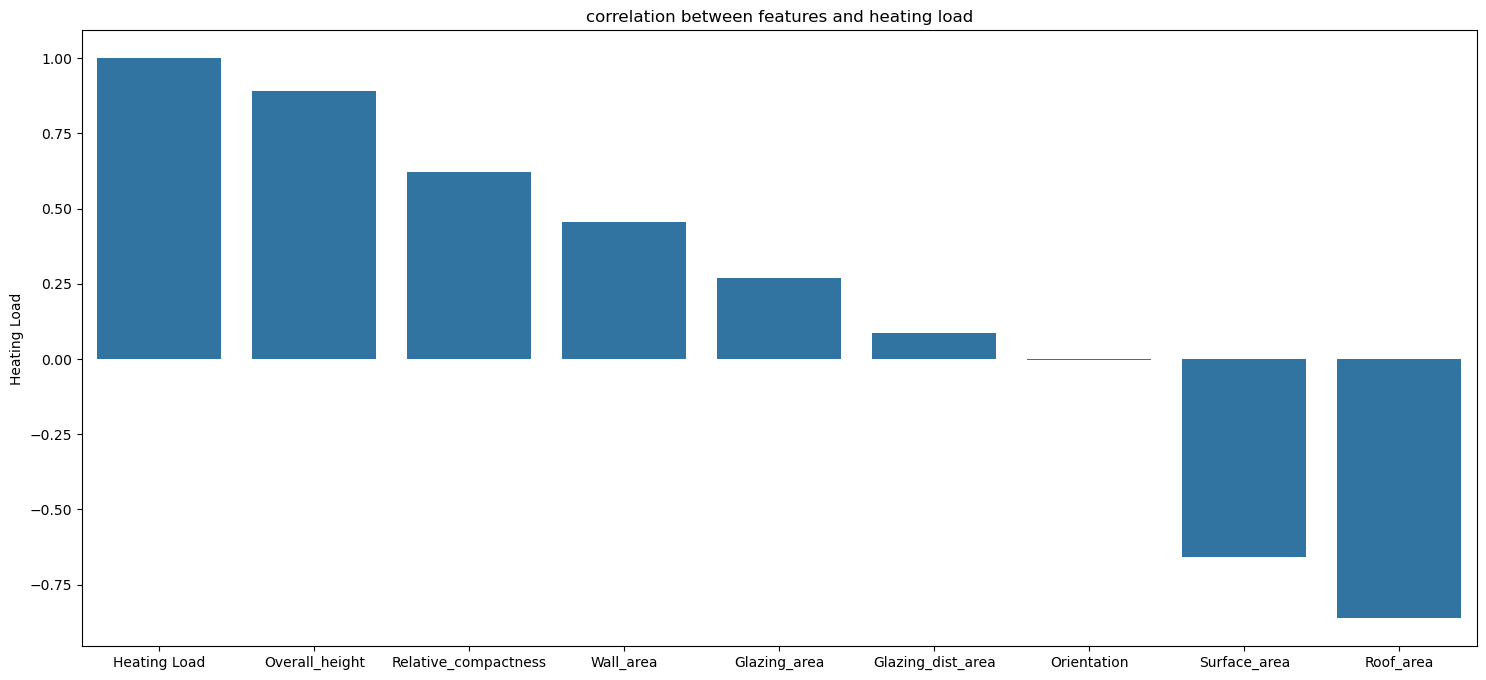

In [21]:
plt.figure(figsize = (18, 8))
sns.barplot(corr_hl)
plt.title("correlation between features and heating load")
plt.show()


#### Relevance of each design to cooling load

In [22]:
corr_df = pd.DataFrame(X, columns = col_names)
corr_df["Cooling Load"] = y["Y2"]

corr_cl = corr_df.corr()["Cooling Load"].sort_values(ascending = False)
corr_cl

Cooling Load            1.000000
Overall_height          0.895785
Relative_compactness    0.634339
Wall_area               0.427117
Glazing_area            0.207505
Glazing_dist_area       0.050525
Orientation             0.014290
Surface_area           -0.672999
Roof_area              -0.862547
Name: Cooling Load, dtype: float64

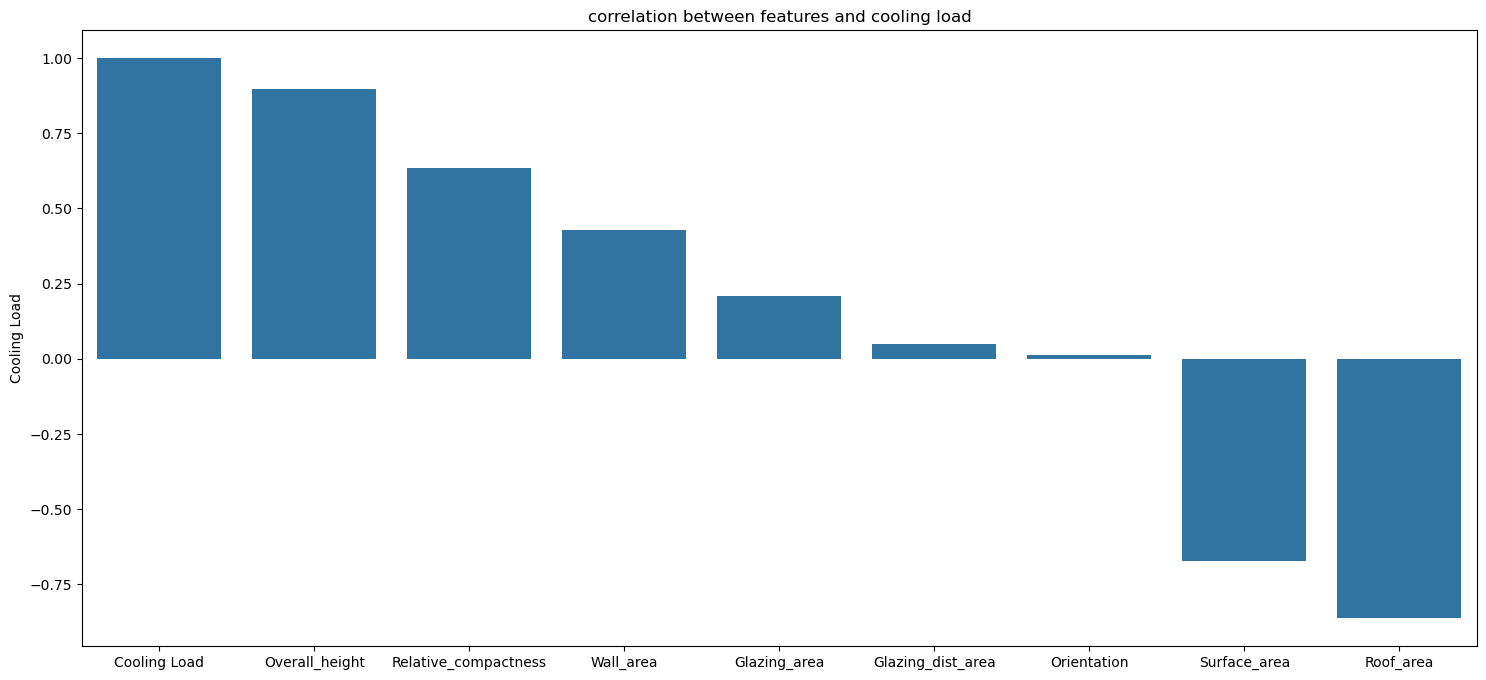

In [23]:
plt.figure(figsize = (18, 8))
sns.barplot(corr_cl)
plt.title("correlation between features and cooling load")
plt.show()


### Assumption checks

for heating load

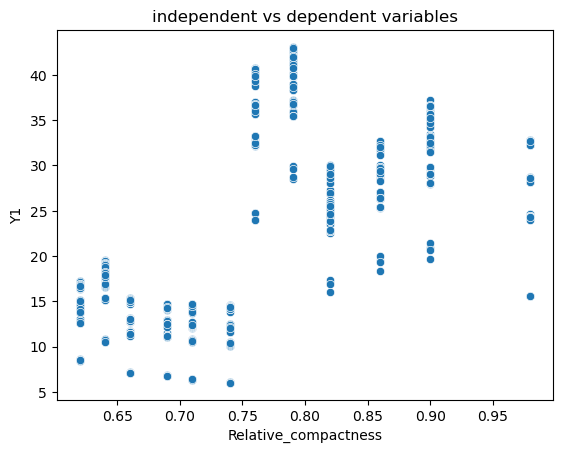

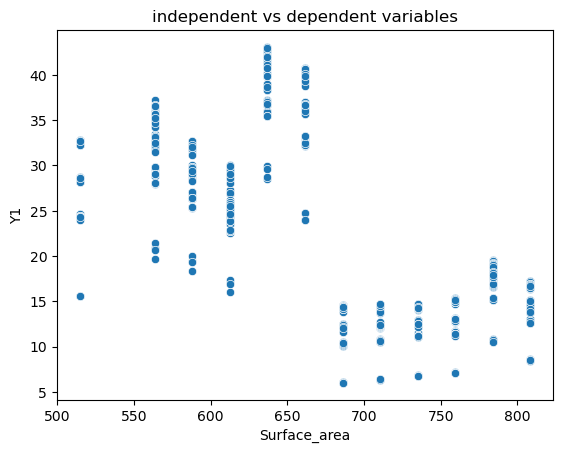

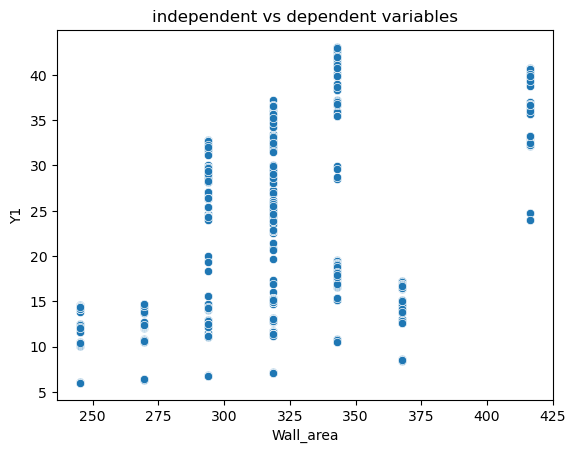

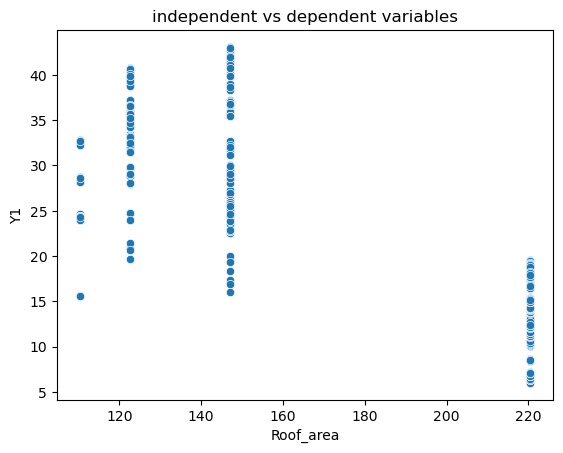

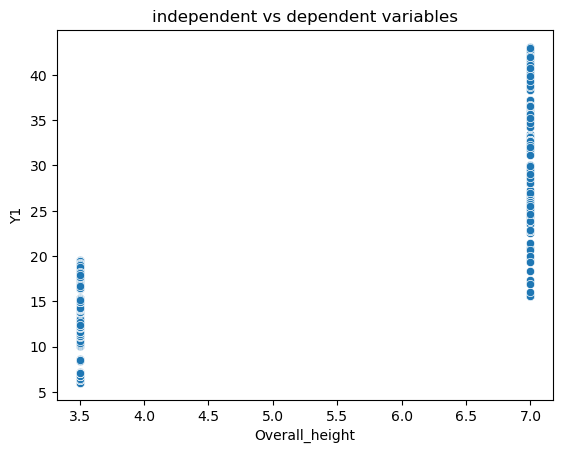

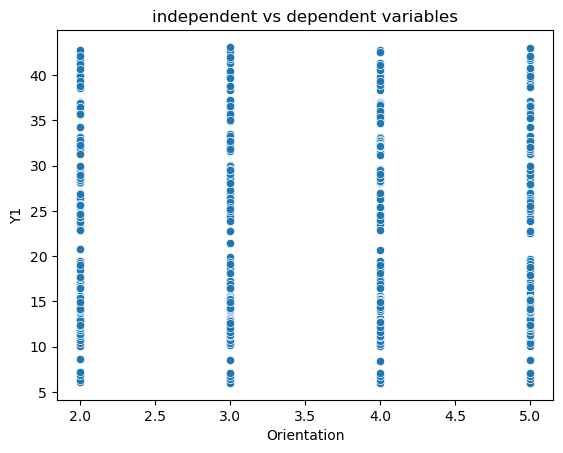

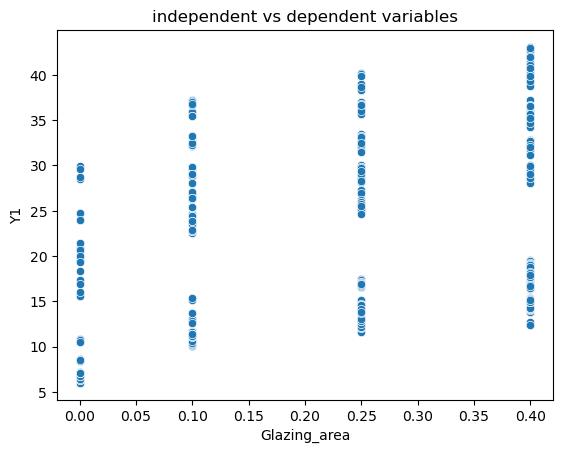

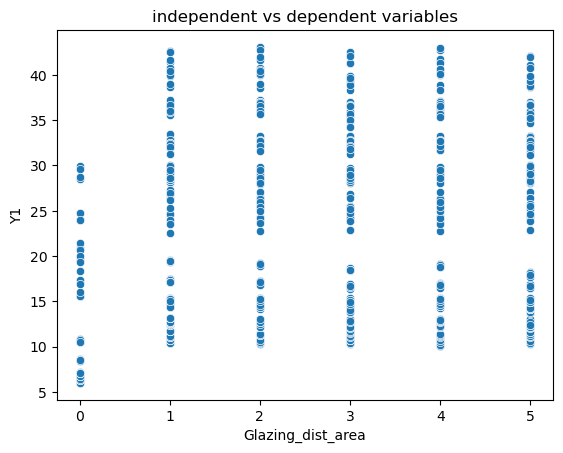

In [24]:
for col in X.columns:
    sns.scatterplot(x = X[col], y = y["Y1"])
    plt.title("independent vs dependent variables")
    plt.xlabel(col)
    plt.ylabel("Y1")
    print()
    plt.show()

In [25]:
import streamlit as st
import joblib

In [26]:
joblib.dump(model, "Sneak.pkl")

['Sneak.pkl']

In [27]:
joblib.dump(ss, "scalerX.pkl")

['scalerX.pkl']

In [28]:
joblib.dump(ssY, "scalerY.pkl")

['scalerY.pkl']

In [29]:
X.max()

Relative_compactness      0.98
Surface_area            808.50
Wall_area               416.50
Roof_area               220.50
Overall_height            7.00
Orientation               5.00
Glazing_area              0.40
Glazing_dist_area         5.00
dtype: float64

In [30]:
X.min()

Relative_compactness      0.62
Surface_area            514.50
Wall_area               245.00
Roof_area               110.25
Overall_height            3.50
Orientation               2.00
Glazing_area              0.00
Glazing_dist_area         0.00
dtype: float64

In [31]:
joblib

<module 'joblib' from 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\joblib\\__init__.py'>